# Actividad #1
## Realizado por: Sebastián Alejandro Sarasti Zambonino
## Materia: Aprendizaje Automático

Importar las librarias básicas para el análisis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargar los datos

In [3]:
data = pd.read_csv('pima-indians-diabetes.csv')

Revisar como luce el dataset

In [4]:
data.head(10)

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Analisis Descriptivo de Datos

Revisar las propiedades de las variables del dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   nEmbarazos                768 non-null    int64  
 1   concentracionGlucosa      768 non-null    int64  
 2   presionArterialSistolica  768 non-null    int64  
 3   pliegueCutaneo            768 non-null    int64  
 4   insulinaSerica            768 non-null    int64  
 5   IMC                       768 non-null    float64
 6   funcionPediDiabe          768 non-null    float64
 7   edad                      768 non-null    int64  
 8   diabetes                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Del resultado anterior se evidencia que solo existen variables del tipo numerica debido a que todas son de tipo entero o flotante

Revisar un resumen estadístico del dataset

In [6]:
data.describe()

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Con una box plot se visualizará graficamente la distribución de cada una de las variables, para comprenderlas de mejor forma

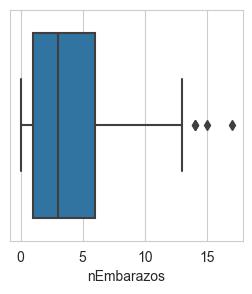

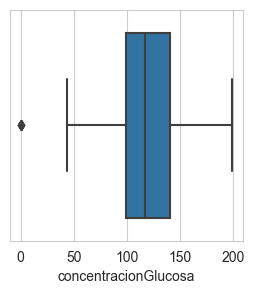

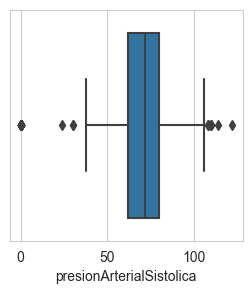

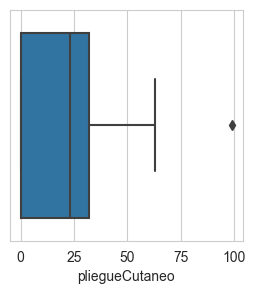

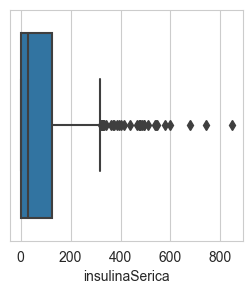

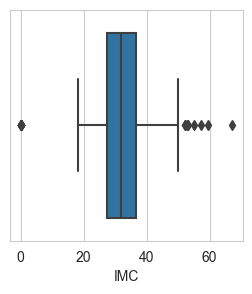

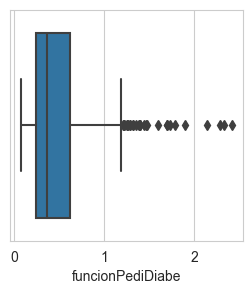

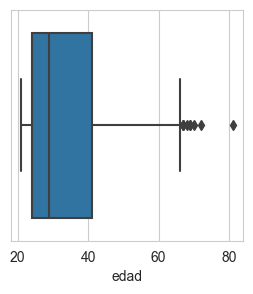

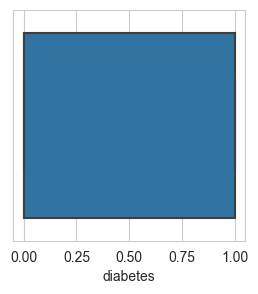

In [7]:
col = list(data.columns)
for i in col:
    plt.figure(figsize=(3,3))
    sns.boxplot(data = data, x = i)
    plt.show()

A primera vista, en base a los resultados anteriores no se puede definir si se debería eliminar una variable o no.

Sin embargo, se evidencia que ciertas variables tienden a tener distribuciones de datos sesgadas como "pliegue_cutaneo" e "insulina_serica" puesto que hasta el intercuartil del 25% de los datos el valor es 0.

Por lo tanto, no se puede eliminar una variable aún en el EDA.

Ahora se analizará los valores como se generan en función de histogramas

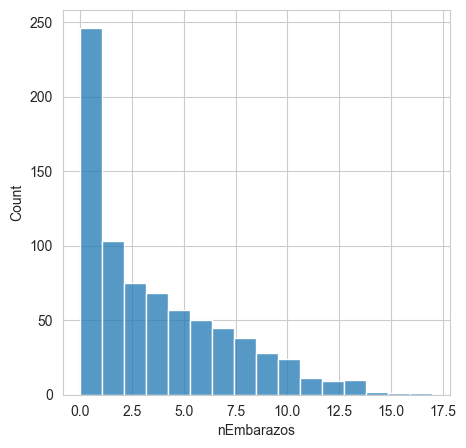

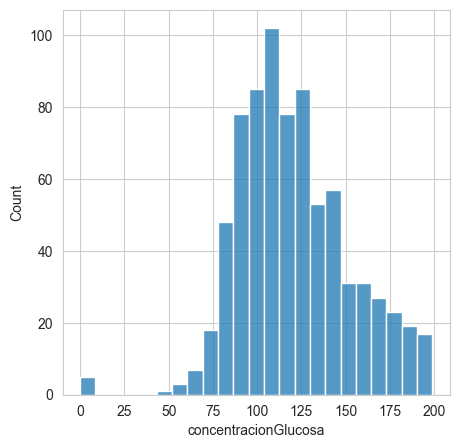

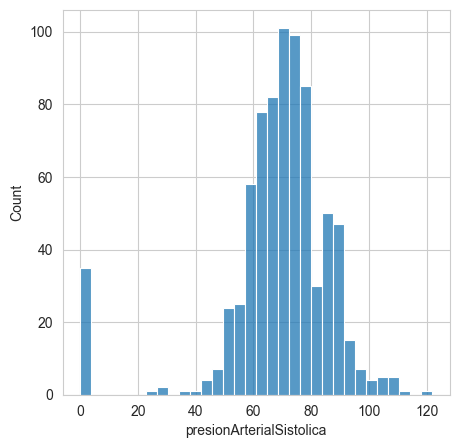

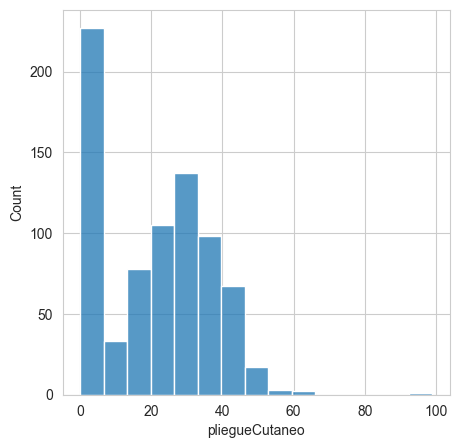

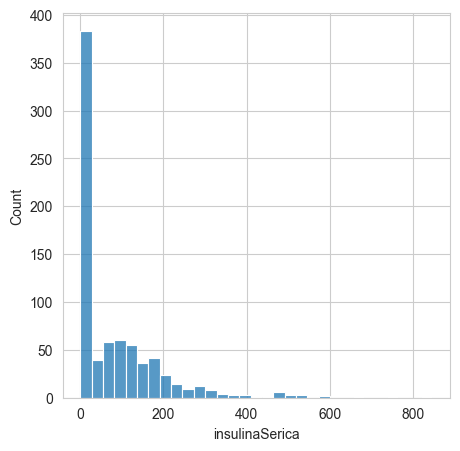

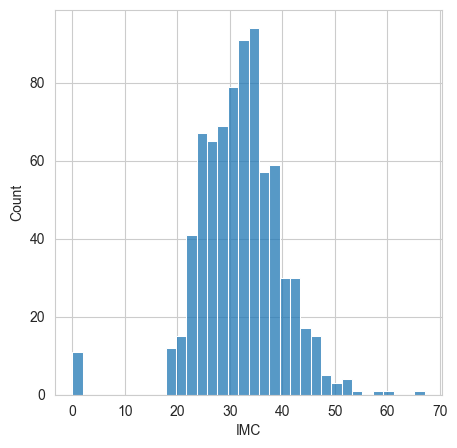

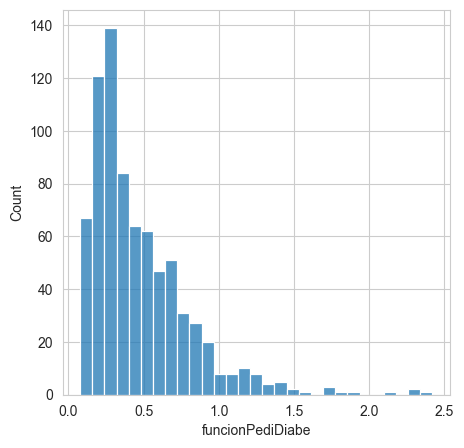

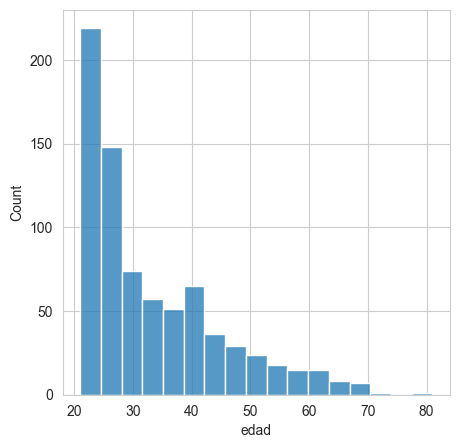

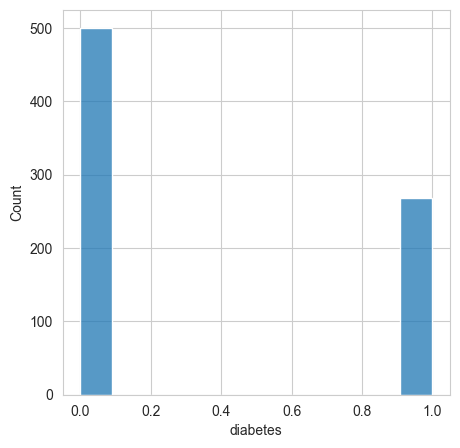

In [8]:
for i in col:
    plt.figure(figsize=(5,5))
    sns.histplot(data = data, x= i )

De los histogramas anteriores se observa que existe una gran concentracion de valores cero, por lo que probablemente son valores que no se pudieron medir en la experimentacion, es decir son valores faltantes que no se escribieron como datos tipo NULL o None. Esto sucede para las variables "IMC", "Insulina_Serica", "Pliegue_cutaneo", "presion_arterial_sistolica" y "concentracion_de_glucosa".

Número de valores NULL en el dataset

In [9]:
data.isnull().sum()

nEmbarazos                  0
concentracionGlucosa        0
presionArterialSistolica    0
pliegueCutaneo              0
insulinaSerica              0
IMC                         0
funcionPediDiabe            0
edad                        0
diabetes                    0
dtype: int64

NaN values

In [10]:
data.isna().sum()

nEmbarazos                  0
concentracionGlucosa        0
presionArterialSistolica    0
pliegueCutaneo              0
insulinaSerica              0
IMC                         0
funcionPediDiabe            0
edad                        0
diabetes                    0
dtype: int64

En efecto, no se registran valores del tipo Null en el dataset. Probablemente, el data entry encargado las tipos como zero values.

In [11]:
(data == 0).sum()

nEmbarazos                  111
concentracionGlucosa          5
presionArterialSistolica     35
pliegueCutaneo              227
insulinaSerica              374
IMC                          11
funcionPediDiabe              0
edad                          0
diabetes                    500
dtype: int64

El resultado anterior muestra que efectivamente existen varias columnas en las que los datos son cero. Por lo que, se deben abordar técnicas para imputar los datos faltantes, ya que al ser un gran número de datos no se pueden eliminarlos.

Se van a reemplazar los datos con zeros con NaN values, unicamente las columnas que si lo requieren ya que la columna de diabetes 0 implica un valor de diagnostico.

In [12]:
zero_col = dict((data == 0).sum())
zeros_del_col = []
for key, value in zero_col.items():
    if value > 0 and key != 'diabetes':
        zeros_del_col.append(key)
    else:
        pass
zeros_del_col

['nEmbarazos',
 'concentracionGlucosa',
 'presionArterialSistolica',
 'pliegueCutaneo',
 'insulinaSerica',
 'IMC']

In [13]:
data[zeros_del_col] = data[zeros_del_col].replace(0,np.nan)

In [14]:
(data ==0 ).sum()

nEmbarazos                    0
concentracionGlucosa          0
presionArterialSistolica      0
pliegueCutaneo                0
insulinaSerica                0
IMC                           0
funcionPediDiabe              0
edad                          0
diabetes                    500
dtype: int64

In [15]:
data.isna().sum()

nEmbarazos                  111
concentracionGlucosa          5
presionArterialSistolica     35
pliegueCutaneo              227
insulinaSerica              374
IMC                          11
funcionPediDiabe              0
edad                          0
diabetes                      0
dtype: int64

Correlación de las variables

<AxesSubplot: >

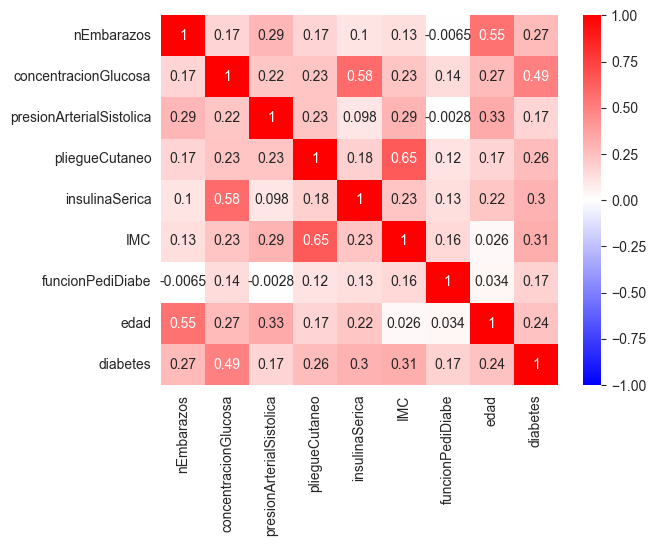

In [16]:
sns.heatmap(data.corr(), cmap = 'bwr', annot = True, vmin = -1, vmax = 1)

Del gráfico anterior se evidenció que los datos no tienen una alta correlación con la variable target (DIABETES), de hecho el valor de correlación más alto fue la variable "concentracionGlucosa". Por lo que aplicar modelos lineales no es la mejor alternativa.

# Tratamiento de datos faltantes
## Eliminación de datos faltantes

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [18]:
data_del = data.dropna()

In [19]:
Y1 = data_del["diabetes"]
X1 = data_del.drop(labels='diabetes', axis=1)
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=0.3)

In [20]:
rf_model1 = RandomForestClassifier()
dt_model1 = DecisionTreeClassifier()
rf_model1.fit(X_train1, Y_train1)
dt_model1.fit(X_train1, Y_train1)

DecisionTreeClassifier()

## Eliminación unicamente de un % de datos faltantes

In [21]:
# Porcentaje de NaN aceptables
perc = 10
min_count =  int(((100-perc)/100)*data.shape[0] + 1)
data_del_p = data.dropna( axis=1, thresh=min_count)

In [22]:
data_del_p.shape

(768, 6)

El resto de valores del dataset se imputaran con la media

In [23]:
data_del_p = data_del_p.fillna(data_del_p.mean())

Revisar que efectivamente ya no existan valores con NaN

In [24]:
data_del_p.isna().sum()

concentracionGlucosa        0
presionArterialSistolica    0
IMC                         0
funcionPediDiabe            0
edad                        0
diabetes                    0
dtype: int64

Dividir datos en entrenamiento y test

In [25]:
Y2 = data_del_p["diabetes"]
X2 = data_del_p.drop(labels='diabetes', axis=1)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.3)

In [26]:
rf_model2 = RandomForestClassifier()
dt_model2 = DecisionTreeClassifier()
rf_model2.fit(X_train2, Y_train2)
dt_model2.fit(X_train2, Y_train2)

DecisionTreeClassifier()

## Imputación de datos faltante con la media

In [27]:
from copy import deepcopy
data_c = deepcopy(data)
data_m = data_c.fillna(data_c.mean())

In [28]:
Y3 = data_m["diabetes"]
X3 = data_m.drop(labels='diabetes', axis=1)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3, Y3, test_size=0.3)

In [29]:
rf_model3 = RandomForestClassifier()
dt_model3 = DecisionTreeClassifier()
rf_model3.fit(X_train3, Y_train3)
dt_model3.fit(X_train3, Y_train3)

DecisionTreeClassifier()

## Imputación de datos faltantes con una función de interpolación

In [30]:
data_i = deepcopy(data)

In [31]:
data_i.isna().sum()

nEmbarazos                  111
concentracionGlucosa          5
presionArterialSistolica     35
pliegueCutaneo              227
insulinaSerica              374
IMC                          11
funcionPediDiabe              0
edad                          0
diabetes                      0
dtype: int64

In [32]:
# interpolacion
data_i = data_i.interpolate(method='linear', limit_direction='forward', order=1)
# extrapolacion
data_i = data_i.interpolate(method='linear', limit_direction='backward', order=1)

In [33]:
data_i.isna().sum()

nEmbarazos                  0
concentracionGlucosa        0
presionArterialSistolica    0
pliegueCutaneo              0
insulinaSerica              0
IMC                         0
funcionPediDiabe            0
edad                        0
diabetes                    0
dtype: int64

In [34]:
Y4 = data_i['diabetes']
X4 = data_i.drop('diabetes', axis = 1)

Dividir datos entre train y test

In [35]:
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X4, Y4, test_size = 0.3)

In [36]:
rf_model4 = RandomForestClassifier()
dt_model4 = DecisionTreeClassifier()
rf_model4.fit(X_train4, Y_train4)
dt_model4.fit(X_train4, Y_train4)

DecisionTreeClassifier()

# Evaluación de los algoritmos

## Primer método de tratamiento de datos faltantes (Eliminando las filas)

In [37]:
from sklearn.metrics import classification_report

In [38]:
Y_pred_dt_1 = dt_model1.predict(X_test1)
Y_pred_rf_1 = rf_model1.predict(X_test1)

In [39]:
scores_dt_1 = classification_report(Y_test1, Y_pred_dt_1)
scores_rf_1 = classification_report(Y_test1, Y_pred_rf_1)

Resultados de los árboles de decisión

In [40]:
print(scores_dt_1)

              precision    recall  f1-score   support

           0       0.77      0.80      0.78        70
           1       0.50      0.45      0.47        31

    accuracy                           0.69       101
   macro avg       0.63      0.63      0.63       101
weighted avg       0.69      0.69      0.69       101



Resultados del random forest

In [41]:
print(scores_rf_1)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        70
           1       0.75      0.58      0.65        31

    accuracy                           0.81       101
   macro avg       0.79      0.75      0.76       101
weighted avg       0.81      0.81      0.80       101



Cross validation


In [42]:
from sklearn.model_selection import cross_val_score

Crear una funcion para automatizar todo el flujo de trabajo y el plot del cros validation

In [43]:
def get_plot_cv(model, X, Y, cv):
    scores_cv_1 = cross_val_score(model, X, Y, cv = cv, scoring = 'accuracy')
    plt.plot(range(1,6), scores_cv_1, 'g-o', label = 'Validación cruzada')
    plt.ylabel('Accuracy')
    plt.xlabel('No.Fold')
    plt.legend()
    print('Mean accuracy is ' + str(np.mean(scores_cv_1)))

Resultados de la validación cruzada
Árboles de decisión

Mean accuracy is 0.7679543459174715


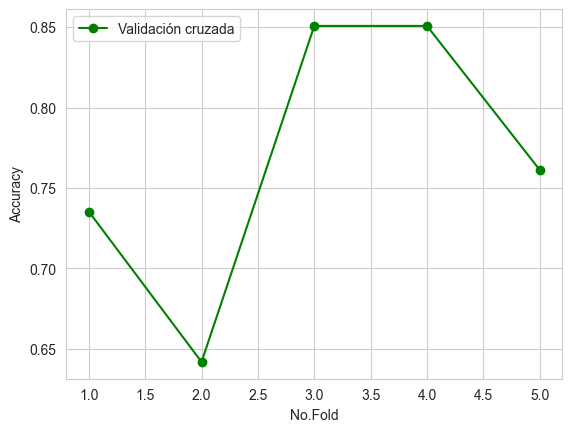

In [44]:
get_plot_cv(dt_model1, X1, Y1, cv = 5)

Random Forest

Mean accuracy is 0.7916593503072871


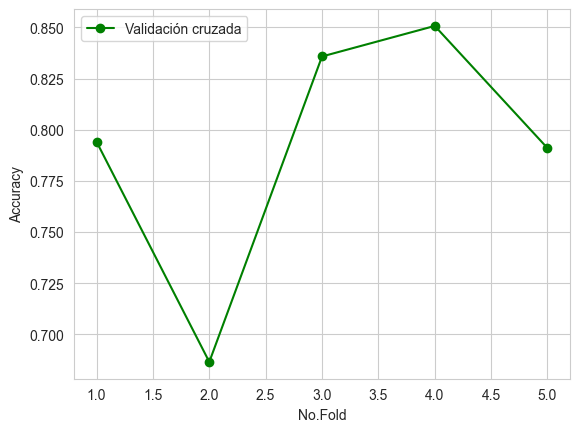

In [45]:
get_plot_cv(rf_model1, X1, Y1, cv = 5)

### Conclusiones Parciales

- De los resultados anteriores se puede determinar que el algoritmo de Random Forest tiene un mayor rendimiento que el Decision Tree.

- Los datos empleados en el análisis son inbalanceados, se evidencia que existe un mayor numero de datos para la clase 0 sin diabetes, que para la clase 1 con diabetes. Esto también se confirma con el resultado de las metricas, que se obtienen valores más grandes para la clase 0 que para la clase 1.

- No existe una gran diferencia de probar con particiones de datos diferentes debido a que la validación cruzada tiende a dar valores similares que los datos de entrenamiento.

## Segundo método eliminando columnas con un % de datos faltantes

In [46]:
Y_pred_dt_2 = dt_model2.predict(X_test2)
Y_pred_rf_2 = rf_model2.predict(X_test2)

In [47]:
scores_dt_2 = classification_report(Y_test2, Y_pred_dt_2)
scores_rf_2 = classification_report(Y_test2, Y_pred_rf_2)

Resultados de los árboles de decisión

In [48]:
print(scores_dt_2)

              precision    recall  f1-score   support

           0       0.74      0.83      0.78       138
           1       0.69      0.57      0.62        93

    accuracy                           0.72       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.72      0.72      0.72       231



Resultados del random forest

In [49]:
print(scores_rf_2)

              precision    recall  f1-score   support

           0       0.74      0.84      0.79       138
           1       0.71      0.57      0.63        93

    accuracy                           0.73       231
   macro avg       0.73      0.71      0.71       231
weighted avg       0.73      0.73      0.73       231



Resultados de la validación cruzada
Árboles de decisión

Mean accuracy is 0.6888549359137596


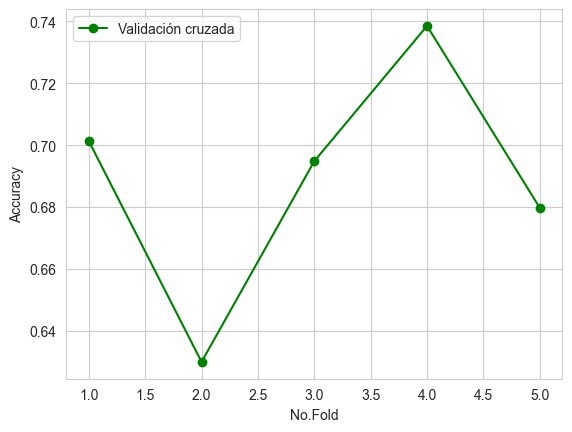

In [50]:
get_plot_cv(dt_model2, X2, Y2, cv = 5)

Random Forest

Mean accuracy is 0.7656650539003481


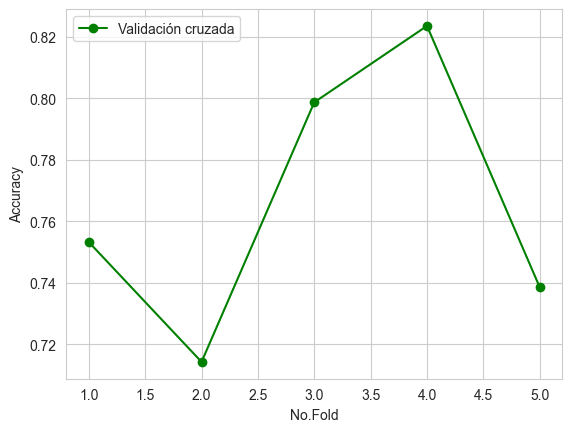

In [51]:
get_plot_cv(rf_model2, X2, Y2, cv = 5)

### Conclusiones Parciales

- Al analizar los resultados del reporte de clasificación, se determinó que eliminar una columna con un porcentaje de datos faltante reduce la capacidad predictiva del dataset. Al comparar los resultados con el literal anterior donde se eliminaron las filas, se evidencia que el dataset anterior fue capaz de dar una mayor informacion al modelo. De hecho, el modelo anterior generó una accuracy superior en 0.05 aproximadamente para ambos modelos.

- Al mismo tiempo, no existe ninguna relevante entre los datos usados para el entrenamiento y los datos empleados en la validación cruzada eliminando las columnas con un % de datos faltantes.

## Imputando valores con la media

In [52]:
Y_pred_dt_3 = dt_model3.predict(X_test3)
Y_pred_rf_3 = rf_model3.predict(X_test3)

In [53]:
scores_dt_3 = classification_report(Y_test3, Y_pred_dt_3)
scores_rf_3 = classification_report(Y_test3, Y_pred_rf_3)

Resultados con árboles de decisión

In [54]:
print(scores_dt_3)

              precision    recall  f1-score   support

           0       0.73      0.78      0.76       153
           1       0.51      0.45      0.48        78

    accuracy                           0.67       231
   macro avg       0.62      0.61      0.62       231
weighted avg       0.66      0.67      0.66       231



Resultados con random forest

In [55]:
print(scores_rf_3)

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       153
           1       0.68      0.58      0.62        78

    accuracy                           0.77       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



Resultados de la validacion cruzada
Árboles de decisión

Mean accuracy is 0.683795942619472


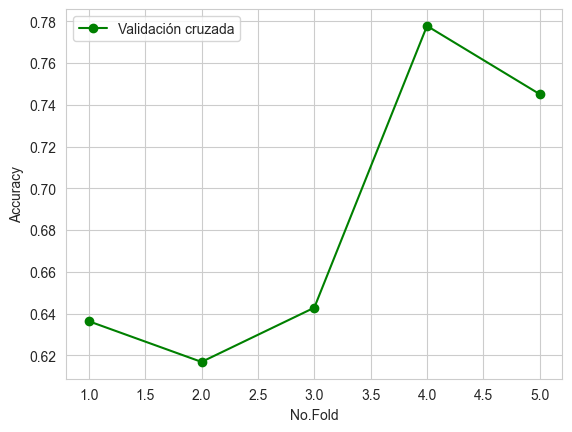

In [56]:
get_plot_cv(dt_model3, X3, Y3, cv = 5)

Random Forest

Mean accuracy is 0.7552839317545199


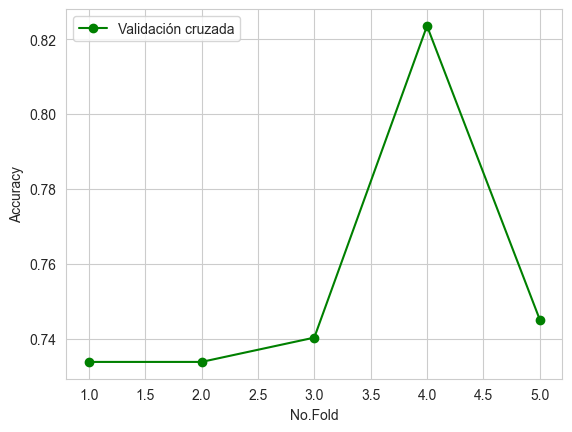

In [57]:
get_plot_cv(rf_model3, X3, Y3, cv = 5)

### Conclusiones Parciales

- Los resultados evidencian que existe una pequeña baja en el rendimiento en ambos modelos al imputar los datos con la media respecto al primer caso (Eliminando filas con valores nulos). De hecho, para ambos modelos generados la accuracy promedio disminuyó en 0.05.
- En ambos algoritmos también tanto árboles de decisión y random forest, los algoritmos son capaces de generalizar bien. No existe una diferencia marcada entre los datos de entrenamiento y los de validación cruzada.



## Imputación de valores mediante una interpolación

In [58]:
Y_pred_dt_4 = dt_model4.predict(X_test4)
Y_pred_rf_4 = rf_model4.predict(X_test4)

In [59]:
scores_dt_4 = classification_report(Y_test4, Y_pred_dt_4)
scores_rf_4 = classification_report(Y_test4, Y_pred_rf_4)

Mirar resultados de árboles de decisión

In [60]:
print(scores_dt_4)

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       148
           1       0.60      0.61      0.61        83

    accuracy                           0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.71      0.72       231



Mirar resultados del random forest

In [61]:
print(scores_rf_4)

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       148
           1       0.66      0.53      0.59        83

    accuracy                           0.73       231
   macro avg       0.71      0.69      0.69       231
weighted avg       0.72      0.73      0.72       231



Resultados de la validación cruzada
Decision Tree

Mean accuracy is 0.7084118495883203


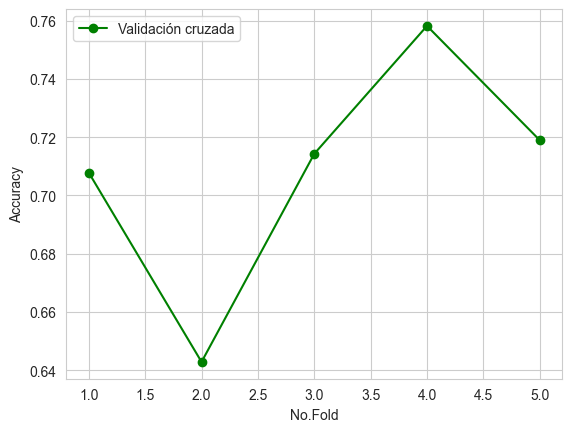

In [62]:
get_plot_cv(dt_model4, X4, Y4, cv = 5)

Random Forest

Mean accuracy is 0.7605211781682369


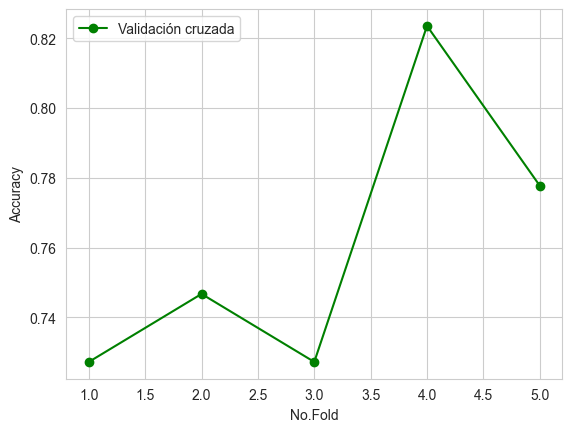

In [63]:
get_plot_cv(rf_model4, X4, Y4,  cv = 5)

### Conclusiones Parciales

- Existe una disminución en la accuracy promedio de la validación cruzada de 0.5 respecto al literal en el cual solo se elminan las filas con datos faltantes. Esto muestra que realizar una interpolación no necesariamente fue el método más adecuado debido a que ambos modelos disminuyeron un 0.05 de accuracy.
- La validación cruzada no muestra señales de overfitting, ya que para cualquier segmento de datos se obtienen resultados aceptables.

## Resultados

1. El algoritmo de random forest tiene una mayor capacidad de generalizar el aprendizaje, para cualquier tratamiento de datos siempre llega a tener rendimiento superior al que los árboles de decisión, en casi todos los casos supera las métricas en 0.1
2. Ninguno de los algoritmos empleados presentó señales de overfitting ya que fueron capaces de dar métricas similares para todas las particiones de los datos.
3. Se determinó que eliminar los datos faltantes fue el mejor proceso para tratar con los datos faltantes debido a que se obtuvieron scores más altos. Sin embargo, también es posible que al eliminar ciertas filas, el rango en el cual el algoritmo debía predecir fue mucho menor, por lo que fue mucho más fácil generalizar el aprendizaje para un conjunto de datos menor.
4. El dataset está inbalanceado, se evidenció que en todos los casos se obtuvieron metricas superiores para la predicción de la clase 0 que la clase 1.

# COMENTARIOS ADICIONALES


1. Según los resultados obtenidos, ¿Cuál sería la forma más correcta de trabajar con los valores faltantes teniendo en cuenta que son datos médicos?

Es importante mencionar que reemplazar valores faltantes con la media o mediante interpolaciones y extrapolaciones, no necesariamente es la manera más directa de generar la información faltante.

La mejor forma para imputar datos se realiza con algoritmos del tipo K-Nearest Neighbors, en el cual se buscan observaciones previas similares y en base a esos resultados se imputa el valor faltante. Con eso se evita reemplazar todo con un valor como la media o forzar a la interpolación o extrapolación de datos.

A continuación se muestra un ejemplo de imputación de datos mediante K-NN

In [64]:
from sklearn.impute import KNNImputer

In [65]:
data_im = deepcopy(data)

In [66]:
data.isna().sum()

nEmbarazos                  111
concentracionGlucosa          5
presionArterialSistolica     35
pliegueCutaneo              227
insulinaSerica              374
IMC                          11
funcionPediDiabe              0
edad                          0
diabetes                      0
dtype: int64

In [67]:
imputer = KNNImputer()
data_im = imputer.fit_transform(data_im)

In [68]:
Y5 = data_im[:,8]
X5 = data_im[:,:8]

In [69]:
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X5, Y5, test_size = 0.3)

In [70]:
rf_model5 = RandomForestClassifier()
dt_model5 = DecisionTreeClassifier()
rf_model5.fit(X_train5, Y_train5)
dt_model5.fit(X_train5, Y_train5)

DecisionTreeClassifier()

In [71]:
Y_pred_dt_5 = dt_model5.predict(X_test5)
Y_pred_rf_5 = rf_model5.predict(X_test5)

In [72]:
scores_dt_5 = classification_report(Y_test5, Y_pred_dt_5)
scores_rf_5 = classification_report(Y_test5, Y_pred_rf_5)

In [73]:
print(scores_dt_5)

              precision    recall  f1-score   support

         0.0       0.82      0.77      0.79       157
         1.0       0.57      0.64      0.60        74

    accuracy                           0.73       231
   macro avg       0.69      0.70      0.70       231
weighted avg       0.74      0.73      0.73       231



Mean accuracy is 0.7317799847211612


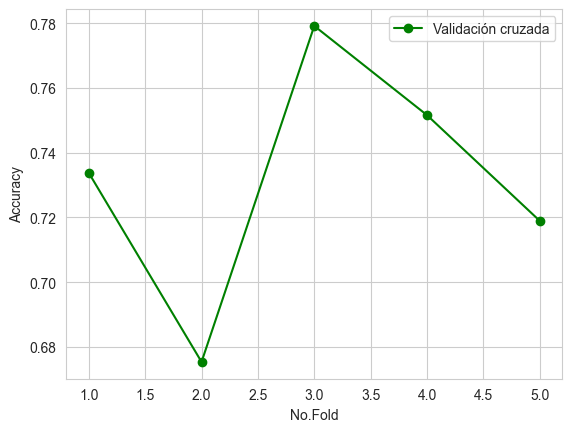

In [74]:
get_plot_cv(dt_model5, X5, Y5,  cv = 5)

In [75]:
print(scores_rf_5)

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86       157
         1.0       0.72      0.64      0.68        74

    accuracy                           0.81       231
   macro avg       0.78      0.76      0.77       231
weighted avg       0.80      0.81      0.80       231



Mean accuracy is 0.7409218232747644


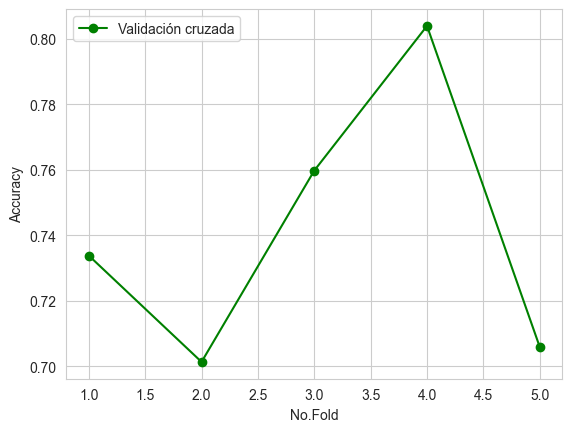

In [76]:
get_plot_cv(rf_model5, X5, Y5,  cv = 5)

2. Comente si tiene alguna sugerencia para mejorar los resultados.

 - Los datos nulos no se pueden eliminar, ya también representan y contienen información útil. En algunos casos tener datos nulos podría ser un evento normal en los tratamientos médicos debido a que la urgencia de estos no permitiera recoger todos los datos. Por lo que analizando más el contexto, se podría aplicar feature engineering para generar una variable mucho más representativa que recoja o analice el porqué no se colectaron los datos.
  - Aplicar técnicas de balanceo del dataset con el objetivo de mejorar la capacidad predictiva.
- Realizar un análisis exploratorio de datos más complejo mediate test de hipótesis  (ANOVA o CHI-2) para descartar las variables que no aportan relevancia al modelo.
- Emplear una matriz de correlación de Phik ya que esta métrica es más potente, permite correlación entre variables de tipo numérica-numérica, numérica-categorica, y categorica-categorica. Estas correlaciones también pueden ser de tipo no lineal